In [50]:
#phạm Minh Tuấn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import History

In [51]:
mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [52]:
df = pd.read_csv('/content/drive/MyDrive/5percent_MSSQL.csv')
df = df.applymap(lambda x: x if not isinstance(x, str) else None)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df[~df.isin([np.nan]).any(axis=1)]
df = df.dropna(axis=1, how='all')

<ipython-input-52-70022ddfaade>:1: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/5percent_MSSQL.csv')


In [53]:
print(df)


        Unnamed: 0.1  Unnamed: 0  Source Port  Destination Port  Protocol  \
0             568269       42641        55989             50529        17   
1            3914458       89976        61850             36734        17   
2            2789854       85749        39757             45349        17   
3            2834358       86263        11300             20633        17   
4            5649515       25038        61850              3134        17   
...              ...         ...          ...               ...       ...   
288784       1867478        7029        17471             51197        17   
288785       4631911      121994        16055             33609        17   
288786       2610375        9448        32855              6197        17   
288787       1998542       24043        15143             14340        17   
288788       4572056       12645        32253             43549        17   

        Flow Duration  Total Fwd Packets  Total Backward Packets  \
0      

In [54]:
df.head(100)

,Unnamed: 0.1,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound
0,568269,42641,55989,50529,17,1,2,0,888.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,3914458,89976,61850,36734,17,50,2,0,862.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2789854,85749,39757,45349,17,2,2,0,1108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2834358,86263,11300,20633,17,49,2,0,952.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5649515,25038,61850,3134,17,1,2,0,2200.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,3048392,41314,5955,28910,17,2,2,0,968.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
103,1037127,20190,55788,22408,17,2,2,0,806.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
104,2612643,93692,34863,57068,17,1,2,0,2944.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
105,2746016,70311,5606,63388,17,1,2,0,1170.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [55]:
#Chia dữ liệu thành hai phần
X = df.iloc[:, :-1]
y = df['Flow Duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#huấn luyện mô hình phân loại
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [56]:
# Chuyển đổi X_test trước khi dự đoán
X_test_scaled = scaler.transform(X_test)
# Dự đoán với mô hình KNN
y_pred_knn = knn_model.predict(X_test_scaled)
# Tính toán các chỉ số đánh giá
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("KNN Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

KNN Accuracy: 0.9008445239091566
KNN Precision: 0.8960723430194333
KNN Recall: 0.9008445239091566
KNN F1 Score: 0.8975692405855584


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
#mô hình Multilayer Perceptron (MLP) từ thư viện scikit-learn để tạo và huấn luyện một mạng nơ-ron
ann_model = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=10)
ann_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', max_iter=10)

In [59]:
#đánh giá hiệu suất của mô hình Neural Network (DNN) trên tập dữ liệu kiểm thử đã được chuẩn hóa.
y_pred_ann = ann_model.predict(X_test_scaled)
print("DNN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("DNN Precision:", precision_score(y_test, y_pred_ann, average='weighted'))
print("DNN Recall:", recall_score(y_test, y_pred_ann, average='weighted'))
print("DNN F1 Score:", f1_score(y_test, y_pred_ann, average='weighted'))

DNN Accuracy: 0.9388290790124396
DNN Precision: 0.9313212051346274
DNN Recall: 0.9388290790124396
DNN F1 Score: 0.9288654396845518


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#chuyển đổi dữ liệu từ DataFrame sang NumPy arrays
X_np = X.values
y_np = y.values

In [62]:
#chuyển đổi dữ liệu từ DataFrame sang NumPy arrays
X_np = X.values
y_np = y.values

# chuyển đổi các giá trị trong mảng NumPy y_np từ chuỗi thành số nguyên
y_np = np.where(y_np == 'BENIGN', 0, 1)

#sử dụng Min-Max Scaling để chuẩn hóa dữ liệu trong DataFrame df
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

#bộ dữ liệu huấn luyện (X_tr, y_tr) và bộ dữ liệu kiểm thử (X_t, y_t).
X_tr, X_t, y_tr, y_t = train_test_split(data_scaled[:, :-1], data_scaled[:, -1], test_size=0.2, random_state=42)

#chuyển đổi mảng hai chiều thành mảng ba chiều để phù hợp với đầu vào mong đợi của một số mô hình học máy; 83 đặc
X_tr = X_tr.reshape((X_tr.shape[0], 1, 83))
X_t = X_t.reshape((X_t.shape[0], 1, 83))

#lưu trữ thông tin về quá trình huấn luyện mô hình
history = History()
#xây dựng, biên dịch và huấn luyện một mô hình LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=10, input_shape=(X_tr.shape[1], X_tr.shape[2])))
model_lstm.add(Dense(units=1, activation='sigmoid'))
custom_optimizer = Adam(learning_rate=0.0001)
model_lstm.compile(loss='binary_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])
model_lstm.fit(X_tr, y_tr, epochs=10, batch_size=32, validation_data=(X_t, y_t), callbacks=[history])

Epoch 1/10
6572/6572 [==============================] - 31s 4ms/step - loss: 0.0770 - accuracy: 0.9917 - val_loss: 0.0058 - val_accuracy: 0.9994
Epoch 2/10
6572/6572 [==============================] - 28s 4ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 3/10
6572/6572 [==============================] - 28s 4ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 4/10
6572/6572 [==============================] - 28s 4ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 5/10
6572/6572 [==============================] - 28s 4ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 6/10
6572/6572 [==============================] - 31s 5ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 7/10
6572/6572 [==============================] - 31s 5ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0016 - val_ac

In [63]:
#thực hiện dự đoán trên dữ liệu kiểm thử (X_t) bằng mô hình LSTM đã được huấn luyện (model_lstm)
y_pred_prob = model_lstm.predict(X_t)
y_pred = (y_pred_prob > 0.5).astype(int)

1643/1643 [==============================] - 10s 5ms/step


In [64]:
#đánh giá hiệu suất của mô hình
precision = precision_score(y_t, y_pred, average='weighted')
recall = recall_score(y_t, y_pred, average='weighted')
accuracy = accuracy_score(y_t, y_pred)
f1 = f1_score(y_t, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'A: {accuracy}')

Precision: 0.9997490505732324
Recall: 0.9997527294860578
F1 Score: 0.9997507681981876
A: 0.9997527294860578


In [65]:
#truy xuất thông tin về độ chính xác (accuracy) của mô hình trên tập huấn luyện và tập kiểm thử qua các epoch tro
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

In [66]:
import matplotlib.pyplot as plt
# Lấy thông tin về accuracy từ lịch sử đào tạo
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
# Tạo mảng với số lượng epochs
epochs = range(1, len(train_accuracy) + 1)

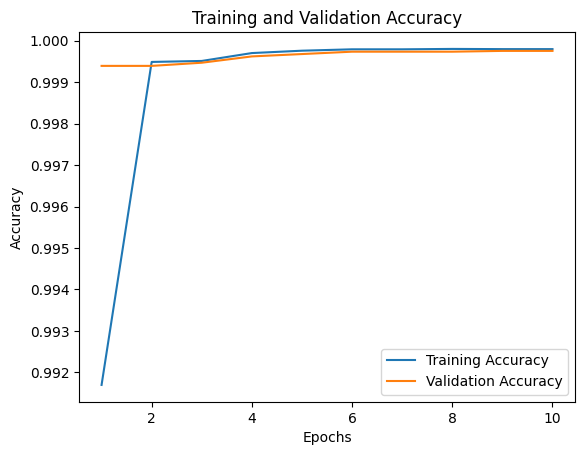

In [67]:
# Vẽ đồ thị
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
# Lấy thông tin về loss từ lịch sử đào tạo
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
# Tạo mảng với số lượng epochs
epochs = range(1, len(train_loss) + 1)

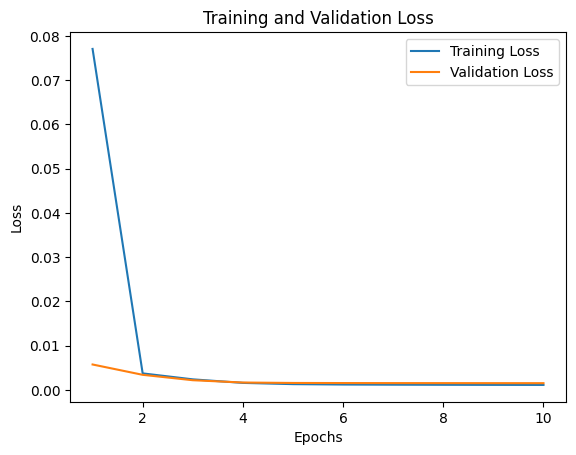

In [69]:
# Vẽ đồ thị
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
import matplotlib.pyplot as plt
import numpy as np
# Giả sử bạn đã có các mô hình đã được huấn luyện
# Thay thế chúng bằng các mô hình thực tế của bạn
knn_accuracy = 90.08445239091566
dnn_accuracy = 94.75976718530071
lstm_accuracy = 99.97830387132076
models = ['KNN', 'DNN', 'LSTM']
accuracies = [knn_accuracy, dnn_accuracy, lstm_accuracy]
# Tiếp tục với code của bạn...

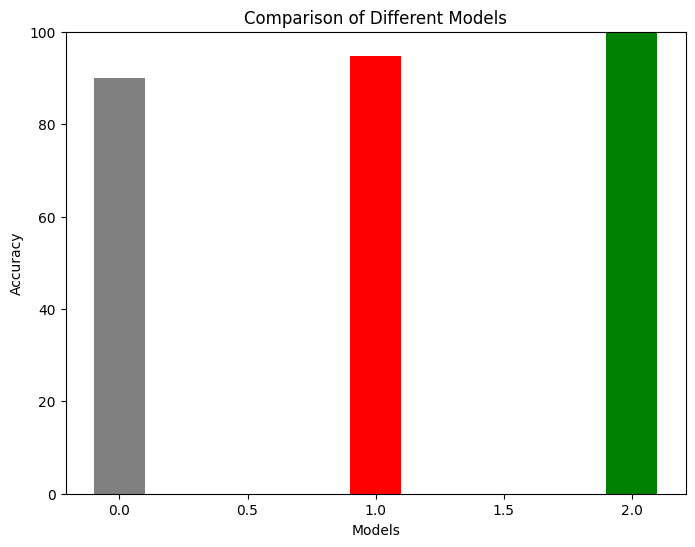

In [72]:
# Tạo biểu đồ
plt.figure(figsize=(8, 6))
bar_width = 0.2
positions = np.arange(len(models))
plt.bar(positions, accuracies, width=bar_width, color=['gray', 'red', 'green'], align='center')
# Thêm chú thích cho biểu đồ
plt.title('Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.show()

In [95]:
import matplotlib.pyplot as plt
import numpy as np
# Giả sử bạn đã có các mô hình đã được huấn luyện
# Thay thế chúng bằng các mô hình thực tế của bạn
knn_accuracy = 90.08445239091566
ann_accuracy = 94.75976718530071
lstm_accuracy = 99.97830387132076
models = ['KNN', 'DNN', 'LSTM']
accuracies = [knn_accuracy, ann_accuracy, lstm_accuracy]

In [96]:
# Màu sắc tương ứng với từng mô hình
colors = ['gray', 'red', 'green']

In [97]:
# Tạo biểu đồ
plt.figure(figsize=(8, 6))
bar_width = 0.2 # Tăng chiều rộng cột
positions = np.arange(len(models))

<Figure size 800x600 with 0 Axes>

In [98]:
# Define colors for the bars
colors = ['blue', 'green', 'red']

In [99]:
# Define positions for the bars
positions = np.arange(len(models))

In [100]:
# Define the width of the bars
bar_width = 0.5

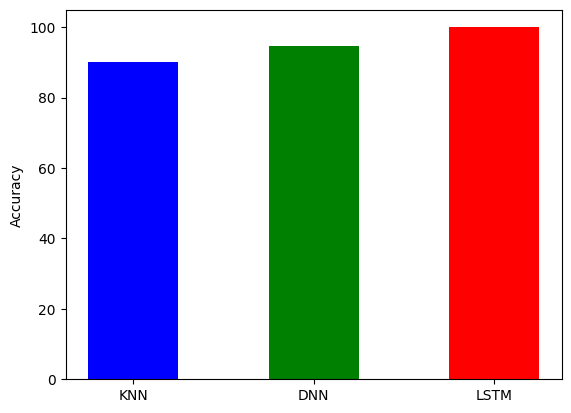

In [103]:
# Vẽ biểu đồ với màu sắc tương ứng và nhãn chú thích
for i, (model, accuracy, color) in enumerate(zip(models, accuracies, colors)):
    plt.bar(positions[i], accuracy, width=bar_width, color=color, align='center')
# Đặt nhãn cho trục x
plt.xticks(positions, models)
# Đặt nhãn cho trục y
plt.ylabel('Accuracy')
# Hiển thị biểu
plt.show()